# Note 1. 과적합

`-` 해당 책에서는 우리가 평소에 회귀분석에서 쓰던 $\text {MSE}= \frac {SSE}{n-(p+1)}$ 이라고 표현하지 않는다.

`-` 교재에서 말하는 $\text{MSE}$란 다음과 같다.

$$\text{MSE} = E[(\hat y - y)^2]$$

`-` 즉, 예측값과 실제값의 차이를 제곱합으로 계산 후 평균을 내는것이다.

`-` 이를 다시 나누어 보자

$$\begin {align} E[(\hat y - y)^2] &= Var(\hat y) + \text {bias}^2   \\ 
                                                                &= E[(\hat y - E(\hat y ))^2] + E[(E(\hat y) - y)^2] + Var(\varepsilon) \end {align}$$

`-` $Var(\hat y) \, \to \,$  훈련자료의 변화에 $\hat y$가 얼마나 민감하게 반응하는가?

`-` $\text {bias}^2$  :  실제자료를 모형으로 얼마나 가깝게 근사할 수 있는가? (만약, $E(\hat y) = y$ 일 경우 해당 추정량은 불편추정량이다.)

* $Var(\hat y),\,\text {bias}^2$ 는 reducible error로 어떤 모델을 선택하느냐에 따라 줄일 수 있는 오차이다.

`-` $Var(\varepsilon)$ : 어떤 모델을 사용하건 줄일 수 없는 오차

`-` Flexibility :  모델 복잡도 측도

* Flexibility가 높아지면 $Var(\hat y)$ 는 높아지고, $\text {bias}$는 낮아진다. (trade-off)
 
* 이를 바꿔말하면 더 유연한(복잡한) 모형은 더 큰 분산을 가지고 더 단순한 모형일수록 큰 편의를 가진다.

* 훈련 데이터로 모델 적합시, `bias`를 낮추기 위해 `Var`를 높여 모델 복잡도를 지나치게 높이는 것은 좋은 선택이 아니다.

* 아래의 예시는 모형의 복잡도가 너무 높으면 **평가 데이터에 대한 MSE**가 오히려 과대추정되는 **"과적합 문제"** 를 보여주고 있다.

<center><img src = "0.png" width = 600></center>

## ex1

<center><img src = "2.png" width = 600></center>

`-` 실제로 위의 원데이터는 일반적인 선형모형으로 적합해도 괜찮을 것 같다.

`-` 왼쪽그림에서 지나치게 복잡하게 적합된 초록색 선을 살펴보자.

* **훈련 MSE(회색선)** 는 3개의 모델 중 가장 낮으나, 과적합 이슈로 **평가 MSE(빨간색선)** 가 과대추정된 것을 볼 수 있다.

## ex2

<center><img src = "1.png" width = 600></center>

`-` 위 데이터는 `ex1`과 달리 일반적인 선형회귀모형으로 적합하면 안될것 같은 느낌이 든다.

`-` 파란색선은 중간 정도로 적합된 복잡한 모형이고, 초록색선은 지나치게 적합된 모형이다.

* 오른쪽 그림을 살펴보면 파란색선으로 적합된 모형의 `Test MSE`가 가장 낮음을 볼 수 있다.

# Note 2. Confusion matrix

`-` 금일 챕터에서는 분류(Classification)의 관한 문제를 다룬다.

`-` 들어가기전에 정밀도, 재현율, 정확도와 같은 예측 성능 지표를 잡고 들어가자.

<center><img src = "4.png" width = 500></center>

`-` 위 데이터는 회사에서 채무를 이행한자, 아닌자에 대한 예측 모델을 만들고 결과를 정리한 표이다.

`-` step 1. 정확도를 살펴보자

* 정확도를 살펴보니 채무이행여부를 판단하기 위해 만든 모델이 적절하게 잘 만들어진 것 같다.

In [288]:
((9644 + 81)/10000)

0.9725

<center><img src = "4.png" width = 500></center>

`-` step2. 회사의 입장(재현율) :  손해를 끼칠 위험이 큰 고객들을 분별해야한다....

* 그런데 실제 채무를 이행하지 않은 사람들은 `333`명인데 예측 모델이 채무를 이행하지 않았다고 예측한 사람은 `81` 명이다.

In [289]:
81/333

0.24324324324324326

<center><img src = "4.png" width = 500></center>

In [290]:
(81/104)

0.7788461538461539

`-` step3. 모델을 만든 강철의 입장(정밀도) :  내 마음을 좀 알아줘...

* 제가 모델을 만들었는데 그래도 참이라고 예측한 것 104명 중에 실제로 84명이 채무를 불이행했거든요?? 그러니까 성과금좀 주세욥

`-` result : 뭐 못 배웠다고 짤리거나 그러겠지....

`-` 시사점 : 심슨의 역설2
    
1.  우리는 단순히 test 데이터에 대한 정확도로만 보고 판단하면 안된다.

2. 이분법적인 사고로 정작 해결해야할 비즈니스적 문제를 놓칠수 있지 않은가?

`-` [심슨의 역설](https://gangcheol.github.io/mysite/posts/Lecture/STDV/2023-05-13-8wk.html#%EC%8B%AC%EC%8A%A8%EC%9D%98-%EC%97%AD%EC%84%A4)

## summary

`1` 정확도 :  전체에서 예측값과 실제값이 일치하는 비율

`2` 정밀도 : 내가 참이라고 예측한 것 중에 실제로 참인 비율 (전, 이걸 모델의 건방짐이라고 외웠습니다.)

`3`  재현율 :  실제 참인 것들 중에서 모델이 참이라고 예측한 비율 (회사의 입장)

***

# Classification

## 1. 로지스틱 회귀모형

`-` 로지스틱 모형은 target 변수인 $y$에 대한 직접적 모형화가 아닌 $y$가 특정 법주에 포함될 확률을 모형화한다.

$$P(y=1 \,|\, \bf {X})$$

`-` 임계치(threshole)를 정하고 어떤 범주에 포함될 확률이 임계치보다 높으면 **0 or 1**로 예측하는 분류 모형이다. (이진분류에서!)

### model 1. 이진분류

step 1.  $P(X)$ : 0과 1사이의 값으로 예측해주는 모형화 작성 **(로지스틱 함수)**

$$P(X) = \frac {\exp (\beta_0 + \beta_{1}X)}{1+\exp (\beta_0 + \beta_{1}X) } \in  (0,1 )$$

step 2. $\frac{P(X)}{ 1- P(X)}$ : odds, 배팅을 하는 분야에서 확률 대신 많이 쓰이는 측도

$$\frac {P(X)}{ 1- P(X)} =  \exp(\beta_0 + \beta_{1} X  ),\quad  \in (0,\infty)$$

step 3. $\log \frac {P(X)}{1-P(X)}$  :  이와 같은 식을 logit이라고 하며,  해당 함수를 선형회귀처럼 작성하면 다음과 같다.

$$\log \frac {P(X)}{1-P(X)}  = \beta_0 + \beta_1 X,\quad \in (-\infty, \infty)$$

### 모델 추정(이진 분류)

`-` 반응변수는 범주형 변수이나 모형을 통해 예측된 값은 확률이므로 최소제곱법 등은 정당화 되기 어려움

* 최대우도추정법(maximum likelihood estimation)으로 보통 추정한다.

* 반응변수가 베르누이 (혹은 아항) 분포임을 이용하여 가능도함수를 기술함

$$L = \prod_{i : y_i=1}p(x_i) \prod_{i^{\prime} : y_i^{\prime} =0}(1-p(x_i)) $$

* $(\hat {\beta}_0, \hat {\beta}_1)$ : 위 수식을 최대화 하는 추정치이다.

### model 2. 다중분류

$$\log \frac {P(X)}{1-P(X)}  = \beta_0 + \beta_1 X + \dots \beta_{p}X_{p},\quad \in (-\infty, \infty)$$

$$p(X) = \frac { \beta_0 + \beta_1 X + \dots \beta_{p}X_{p}}{1+exp\,( \beta_0 + \beta_1 X + \dots \beta_{p}X_{p})},\quad \in (0,1)$$

***

## 2. 판별분석(discriminant analysis)

`-` 반응변수가 셋 이상의 범주를 가질 떄, 로지스틱 모형을 확장하여 위와 같이 고려할 수 있다.

`-`  그러나 다른 대안들의 존재로 인해 이 경우 로지스틱 모형은 폭넓게 스이지는 않는다.

`-` 대표적인 대안 중 하나는 **선형판별분석**이다.

* 반응변수와 예측변수들의 결합분포에 기반한 방법

* $n$이작고 $X$의 분포가 정규분포에 가까울 때 판별분석의 성능이 로지스틱보다 좋다.

`-` 베이즈 정리

* $k$번째 범주로부터 관측된 $X$의 분포를 $f_k(x)= P(X=x|Y =k) = P(X=x,Y =k)$ 라 하고, $\pi_k= P(Y=k)$ 를 각 범주의 사전확률이라고 하면, 베이즈 정리에 의하여 다음을 얻는다.

$$P(Y=k | X=x) = \frac{\pi_k f_k(x)}{\sum_{i=1}^{K} \pi_{i}f_{i}(x)}$$

### (1) LDA(Linear discriminant analysis)

`-`  $p=1, f_k(x)$가 정규분포임과 동시에 각 범주에 해당하는 분포의 분산은 동일하다 가정

* $p$ 는 예측변수의 개수

$$X \sim N(\mu_k, \sigma_k^{2})$$

`-` 조건부 확률 $P(Y=k | X=x))$를 최대화 시키는 $k$를 찾는 것은 아래의 판별함수를 최대화하는 $k$를 찾는 것이다.

* $\hat{\delta}_{k}$ 를 최대화시키는 범주 $k$로 관측치를 할당.

$$\delta_k(x) = x \frac {\mu_k}{\sigma^2} - \frac {\mu_{k}^2}{2\sigma^2}+ \log \pi_k$$

`-` $K=2$인 경우, 분류를 위한 경계치는

$$x = \frac {\mu_1+\mu_2}{2}$$

<center> <img src = "5.png" width = 400></center>

`-` 또한, $p=1$인 경우,  LDA는 다음과 같이 베이즈 분류기를 근사하게 된다.

$$\hat {\delta}_k(x) = x \frac {\hat {\mu}_k}{\hat{\sigma}^2} - \frac {\hat{\mu}_{k}^2}{2\hat{\sigma}^2}+ \log \hat{\pi}_k$$

$$\hat {\mu}_k = \frac{1}{n_k} \sum_{i : y_i=k} x_i$$

$$\hat {\sigma}^2 = \frac{1}{n-K} \sum_{k=1}^K \sum_{i:y_i = k} (x_i - \hat {\mu}_k)^2$$

$$\hat {P}(Y=k) = \hat {\pi}_k  = \frac{n_k}{n}$$

`-` LDA의 `linear`라는 단어는 판별함수 $\hat {\delta}_k(x)$가  $x$의 선형함수로 표현된다는 사실로부터 유래한다.

#### if, p>1?

`-` 예측변수가 다변량인 경우 $k$번째 범주에서 예측변수가 다변량 정규분포를 따른다는 가정으로부터 출발한다.

$$f_k(x) \sim N(\mu_k, \Sigma)$$

`-` $p=1$ 일 때와 마찬기지로 모든 범주에서 공분산 행렬 $\sum$는 동일하다고 가정

$$\delta_k(x) = x ^{\top}{\Sigma}^{-1} {\mu_k}- \frac {1}{2} \mu_{k}^{\top}{\Sigma}^{-1}\mu_k+ \log \pi_k$$

### (2) QDA(Quadratic discriminant analysis)

`-` LDA와 다르게 각 범주를 특정하는 정규분포의 분산에 이질성을 허용한다.

$$X \sim N(\mu_k, {\Sigma}_k)$$

`-` 판별함수는 다음과 같다.

$$\delta_k(x) = -\frac{1}{2}(x-\mu_k) ^{\top}{\Sigma}_{k}^{-1}(x-\mu_k)- \frac {1}{2}\log |{\Sigma}_k|\log \pi_k$$

##  3. KNN(K-nearest neighbors)

`-` 조건부 확률을 인접한 $K$개의 data points의 상대비율로 추정

$$P(y=j | X = x_0) = \frac{1}{K} \sum_{i\in N_0} I(y_i=j)$$

$$N_0  : x_0  \text{와 가장 가까운} K \text{개의 자료의 집합}$$

`-` 위 확률을 최대로 하는 $j$로 관측치를 분류

`-` K의 선택이 분류기의 성능을 결정하는데 매우 핵심적인 역할을 수행한다,

## summary

`-` 범주가 2개일 때, LDA와 로지스틱모형은 선형적인 decision boundary를 생성한다는 측면에서 동일함

`-` 각 범주의 분포가 정규분포로 잘 근사되는지 여부에 의해서 두 방식의 성능이 엇갈릴 수 있음

`-`  KNN은 decision boundary에 어떠한 가정도 하지 않음. 즉, decision boundary가 비선형인 경우 위 두 방식에 비해 우월성을 보임


`-` QDA는 qudratic decision boundary를 설정한다는 면에서 KNN과 LDA 혹은 로지스틱의 중간쯤에 위치하는 방법으로 볼 수 있음

* **모든 상황에서 항상 우월한 분류기는 없다**

## 4. Naive Bayes

`-` 사실 LDA, QDA의 경우  $X$의 확률분포가 정규분포라고 추정하는 것은 어렵다.

1.  예측변수 $X_j$ 간의 어떠한 연관성이 있을수가 있음. 즉 독립이 아님

2.  따라서 추정이 어려움, 독립이 아닐경우, 결합분포, 주변확률 분포 등등 사전, 사후 확률 계산시  고려해야할 사항들이 너무 많고 복잡함.

3.  그래서 나이브 베이즈에서는 각각의 클래스안에서 예측변수들은 서로 독립이다. 라는 가정에서  출발

4. $k$번째 클래스 안에서 $X_j$에 대한 확률분포는 다음과 같다.

$$X_j|Y = k \sim N(\mu_{jk},\sigma^{2}_{jk})$$

`-` 아래는 $k$번째 클래스의 확률분포이다.

$$f_k(x) = f_{k1}(x_1) \times \dots  \times f_{kp}(x_p) $$

`-` 이제 사후 확률을 계산식을 살펴보자

$$P(Y=k|X=x ) = \frac{\pi_k \times f_{k1}(x_1) \times f_{k2}(x_2) \times f_{kp}(x_p)}{\sum_{i=1}^{k}\pi_i \times f_{i1}(x_1) \times f_{i2}(x_2) \times f_{ip}(x_p) }$$

`-` example : $\pi_1= \pi_2= 0.5$

$K=1, (\hat {f}_{11}(0.4) = 0.368, \,\hat{f}_{12}(1.5) = 0.484, \, \hat {f}_{13}(1) = 0.226)  $

$K=2, (\hat {f}_{21}(0.4) = 0.030, \,\hat{f}_{22}(1.5) = 0.130, \, \hat {f}_{23}(1) = 0.616)  $

위 공식을 이용하여 각각에 대한 사후활률을 추정하면?

In [291]:
k1= 0.5*0.368*0.484*0.226/(0.5*0.368*0.484*0.226+ 0.5*0.030*0.130*0.616)
k2 = 0.5*0.030*0.130*0.616/(0.5*0.368*0.484*0.226+ 0.5*0.030*0.130*0.616)

print(f"P(y=1) ={k1 : .3f}, P(y=2) ={k2 : .3f} ")

P(y=1) = 0.944, P(y=2) = 0.056 


* 나이브 베이즈 분류기는 확실이 LDA, QDA보다 계산이 간단하고 모델링 시 더 빠르게 수행될 것 같음

***

# Lab

## import

In [1]:
# | code-fold : true
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

## data load

In [293]:
Smarket = load_data('Smarket')
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [294]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


`-` 해당 데이터는 2001년 부터 2005년까지 주식 데이터이다.

* Year는 해당 데이터가 관측된 년도

* Lag1은 하루 전의 수익률

* Lag2는 이틀 전의 수익률

* 이렇게 Lag5까지 5일 전까지의 수익률을 가지고 있다.

* Volume은 하루에 평균적으로 몇 주가 거래되었는지 

* Today는 오늘의 수익률

* Direction은 오늘 시장이 Up인지 Down인지 (target)

## correlation

In [295]:
Smarket.select_dtypes("number").corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


* `Lag_i, todayt` 간 상관계수는 거의 0에 가깝다.

* 유일하게 의미가 있아보이는 상관관계는 `Year, Volume`로 계산된 $r$이 **'0.539'** 이다.

* 다시 말해서, 2001년부터 2005년까지, 하루 평균 거래량이 증가하고 있다.

<Axes: >

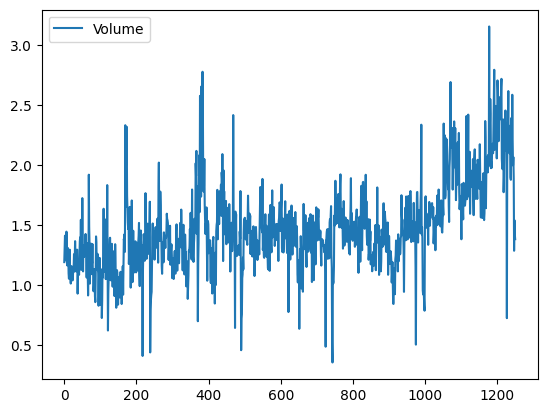

In [296]:
Smarket.plot( y="Volume")

## model1. Logistic

`-` Lag1 ~ Lag5 까지의 변수로 금일 시장이 `up`인지 `down`인지 예측해보자.

In [297]:
# step 1. x,y를 저장
allvars = Smarket.columns.drop(["Today","Year","Direction"])

X = MS(allvars).fit_transform(Smarket) 
y = Smarket.Direction == "Up"

# step 2.  모형 적합

glm = sm.GLM(y,X , family = sm.families.Binomial())

# step 3. 모형에 대한 유의성 확인
results = glm.fit()
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

* 유의미한 변수가 한개도 없다..

* 그나마 p-value가 낮은, lag1, lag2만 포함시켜보자


`-` predict() : 데이터 집합을 인자로 전달해주지 않으면 훈련 데이터를 이용하여 예측을 수행

In [298]:
# step 1. x,y를 저장

X = MS(["Lag1","Lag2"]).fit_transform(Smarket) 
y = Smarket.Direction == "Up"

# step 2.  모형 적합

glm = sm.GLM(y,X , family = sm.families.Binomial())

# step 3. 모형에 대한 유의성 확인
results = glm.fit()

In [299]:
probs = results.predict()

labels = np.array(["Down"]*1250)
labels[probs > 0.5] = "Up"
label = ["Up","Down"]

confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,114,102
Up,488,546


### 데이터셋 분할

`-` 2005년 이전을 train, 이후를 test로 전환

In [300]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[-train]

X_train, X_test = X.loc[train], X.loc[-train]
y_train, y_test = y.loc[train], y.loc[-train]

### 모델 적합

In [302]:
glm_train = sm.GLM(y_train,
                  X_train,
                family=sm.families.Binomial())

results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)

labels[probs >0.5] = 'Up'

In [304]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[-train]

In [306]:
np.mean(labels == L_test)

0.5595238095238095

In [307]:
report = classification_report(y_true = L_test, y_pred = labels,target_names=label,output_dict=True)
result_acc_logistic = pd.DataFrame({"acc" : [report["accuracy"]],
                             "model" : ["로지스틱"]})
result_acc_logistic

,acc,model
0,0.559524,로지스틱


In [309]:
result_logistic = pd.DataFrame(report).\
                                    eval("model = '로지스틱'")[["Up","model"]].\
                                                reset_index().iloc[:-1,]
result_logistic

,index,Up,model
0,precision,0.500000,로지스틱
1,recall,0.315315,로지스틱
2,f1-score,0.386740,로지스틱
